In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country' , 'salary']

In [4]:
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

In [5]:
df.shape

(32561, 15)

In [6]:
def handle_capital_gain(df):
  df['capital-gain'] = np.where(df['capital-gain'] == 0 , np.nan , df['capital-gain'])
  df['capital-gain'] = np.log(df['capital-gain'])
  df['capital-gain'] = df['capital-gain'].replace(np.nan , 0)

In [7]:
handle_capital_gain(df)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


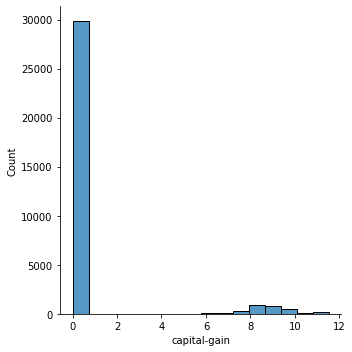

In [9]:
sns.displot(df['capital-gain'])

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

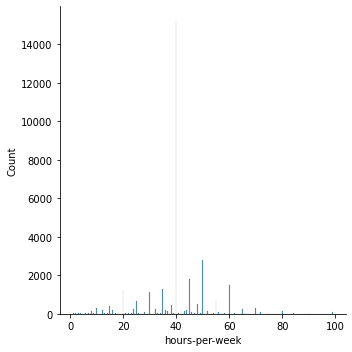

In [13]:
# removing outliers from hours-per-week
sns.displot(df['hours-per-week'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


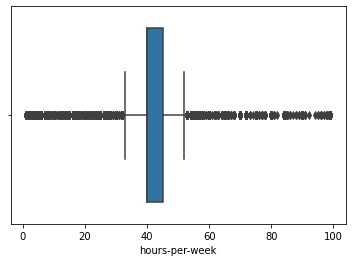

In [14]:
sns.boxplot(df['hours-per-week'])

In [15]:
def remove_outlier_hours_per_week(df):
  IQR  = df['hours-per-week'].quantile(0.75) - df['hours-per-week'].quantile(0.25)

  lower_range = df['hours-per-week'].quantile(0.25) - (1.5 * IQR)
  upper_range = df['hours-per-week'].quantile(0.75) + (1.5 * IQR)

  df.loc[df['hours-per-week'] <= lower_range , 'hours-per-week'] = lower_range
  df.loc[df['hours-per-week'] >= upper_range , 'hours-per-week'] = upper_range

In [16]:
remove_outlier_hours_per_week(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


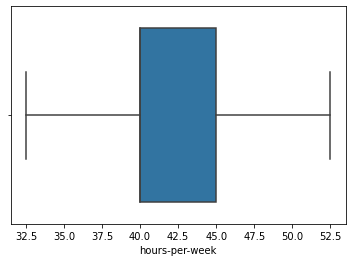

In [17]:
sns.boxplot(df['hours-per-week'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


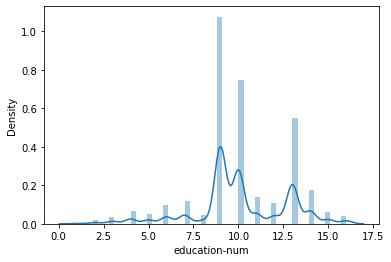

In [18]:
# Removing outliers from education-num
sns.distplot(df['education-num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


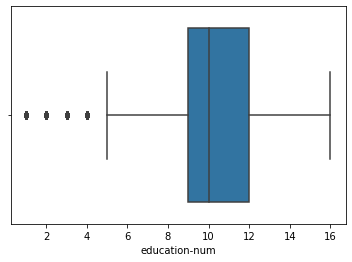

In [19]:
sns.boxplot(df['education-num'])

In [20]:
def remove_outlier_education_num(df):
  IQR = df['education-num'].quantile(0.75) - df['education-num'].quantile(0.25)

  lower_range = df['education-num'].quantile(0.25) - (1.5 * IQR)
  upper_range = df['education-num'].quantile(0.75) + (1.5 * IQR)

  df.loc[df['education-num'] <= lower_range , 'education-num'] = lower_range
  df.loc[df['education-num'] >= upper_range , 'education-num'] = upper_range

In [21]:
remove_outlier_education_num(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


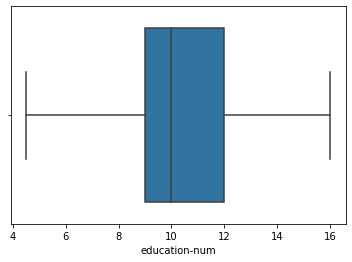

In [22]:
sns.boxplot(df['education-num'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


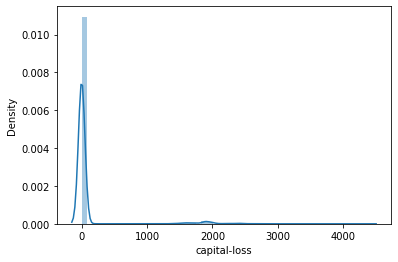

In [23]:
sns.distplot(df['capital-loss'])

In [24]:
def capital_loss_log(df):
  df['capital-loss'] = np.where(df['capital-loss'] == 0 , np.nan , df['capital-loss'])
  df['capital-loss'] = np.log(df['capital-loss'])
  df['capital-loss'] = df['capital-loss'].replace(np.nan , 0)

In [25]:
capital_loss_log(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


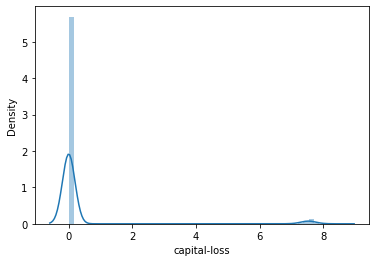

In [26]:
sns.distplot(df['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


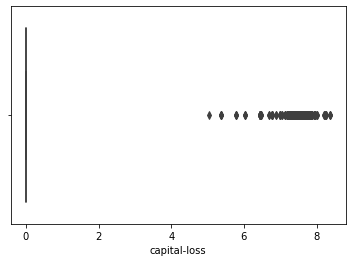

In [27]:
sns.boxplot(df['capital-loss'])

In [28]:
def remove_outlier_capital_loss(df):
  IQR = df['capital-loss'].quantile(0.75) - df['capital-loss'].quantile(0.25)

  lower_range = df['capital-loss'].quantile(0.25) - (1.5 * IQR)
  upper_range = df['capital-loss'].quantile(0.75) + (1.5 * IQR)

  df.loc[df['capital-loss'] <= lower_range , 'capital-loss'] = lower_range
  df.loc[df['capital-loss'] >= upper_range , 'capital-loss'] = upper_range

In [29]:
remove_outlier_capital_loss(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


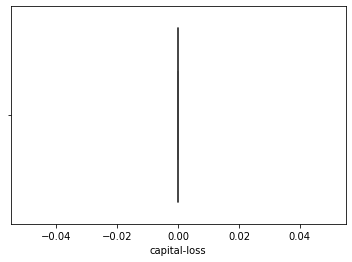

In [30]:
sns.boxplot(df['capital-loss'])

In [31]:
def feature_engineering(df):
  df['salary'] = df['salary'].replace(' >50K' , '>50K')
  df['salary'] = np.where(df['salary'] == '>50K' , 1 , 0)

  df['sex'] = np.where(df['sex'] == 'Male' , 1 , 0)

  label_enco_race = {value : key for key , value in enumerate(df['race'].unique())}
  df['race'] = df['race'].map(label_enco_race)

  label_enco_relation = {value: key for key , value in enumerate(df['relationship'].unique())}
  df['relationship'] = df['relationship'].map(label_enco_relation)

  df['occupation'] = np.where(df['occupation'] == ' ?' , 'Missing' , df['occupation'])
  label_enco_occupation = {value: key for key , value in enumerate(df['occupation'].unique())}
  df['occupation'] = df['occupation'].map(label_enco_occupation)

  label_enco_marital_status = {value : key for key , value in enumerate(df['marital-status'].unique())}
  df['marital-status'] = df['marital-status'].map(label_enco_marital_status)

  label_enco_education = {value : key for key , value in enumerate(df['education'].unique())}
  df['education'] = df['education'].map(label_enco_education)

  df['workclass'] = np.where(df['workclass'] == ' ?' , 'Missing' , df['workclass'])
  label_enco_workclass = {value : key for key , value in enumerate(df['workclass'].unique())}
  df['workclass'] = df['workclass'].map(label_enco_workclass)

  df['native-country'] = np.where(df['native-country'] == ' ?' , 'Missing' , df['native-country'])
  label_enco_native_country = {value : key for key , value in enumerate(df['native-country'].unique())}
  df['native-country'] = df['native-country'].map(label_enco_native_country)


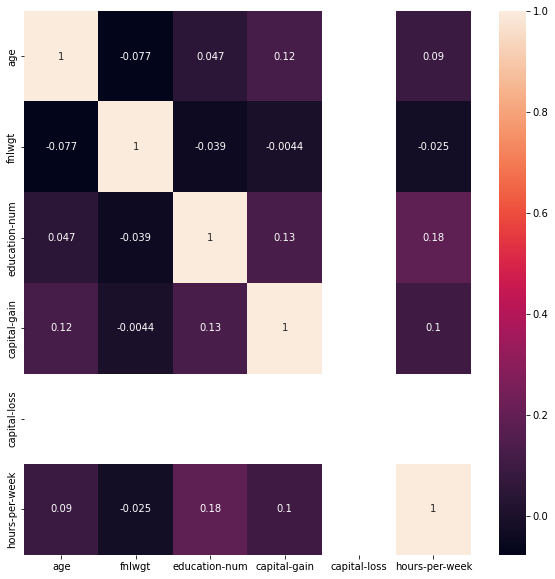

In [32]:
plt.figure(figsize=(10 ,10))
corr = df.corr()
sns.heatmap(corr , annot = True)

In [33]:
df = df.drop('fnlwgt' , axis = 1)

In [34]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [35]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [36]:
feature_engineering(df)

In [37]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
sc = StandardScaler()

In [40]:
X = df[['age' , 'workclass' , 'education' , 'education-num' , 'marital-status' , 'occupation' ,'relationship' ,
        'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country']]

In [41]:
y = df['salary']

In [42]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [43]:
X = sc.fit_transform(X)
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

In [45]:
print('Train data shape : {}'.format(X_train.shape))
print('Test data shape : {}'.format(X_test.shape))

Train data shape : (26048, 13)
Test data shape : (6513, 13)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg_model = LogisticRegression()

In [50]:
lg_model.fit(X_train , y_train)

LogisticRegression()

In [51]:
y_pred = lg_model.predict(X_test)

In [52]:
result = {
    'Actual' : y_test,
    'Predicted' : y_pred
}

In [53]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [54]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [55]:
print('Accuracy Score : {}'.format(accuracy_score(y_test , y_pred)))
print('Confussion Matrix : \n {}'.format(confusion_matrix(y_test , y_pred)))
print('Classification Report : \n {}'.format(classification_report(y_test , y_pred)))

Accuracy Score : 0.8083832335329342
Confussion Matrix : 
 [[4624  318]
 [ 930  641]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4942
           1       0.67      0.41      0.51      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.67      0.69      6513
weighted avg       0.79      0.81      0.79      6513

